Epoch [1/50], Loss D: 0.00018188565445598215, Loss G: 9.154605865478516
Epoch [2/50], Loss D: 0.822040319442749, Loss G: 1.0770844221115112
Epoch [3/50], Loss D: 0.8525257706642151, Loss G: 0.9501289129257202
Epoch [4/50], Loss D: 0.5100058317184448, Loss G: 1.6580801010131836
Epoch [5/50], Loss D: 0.885226309299469, Loss G: 2.6249258518218994
Epoch [6/50], Loss D: 0.5540984869003296, Loss G: 2.308957099914551
Epoch [7/50], Loss D: 0.5754302740097046, Loss G: 2.1678032875061035
Epoch [8/50], Loss D: 0.588639497756958, Loss G: 1.5644824504852295
Epoch [9/50], Loss D: 0.7085966467857361, Loss G: 2.607466697692871
Epoch [10/50], Loss D: 0.4361579418182373, Loss G: 2.005086660385132


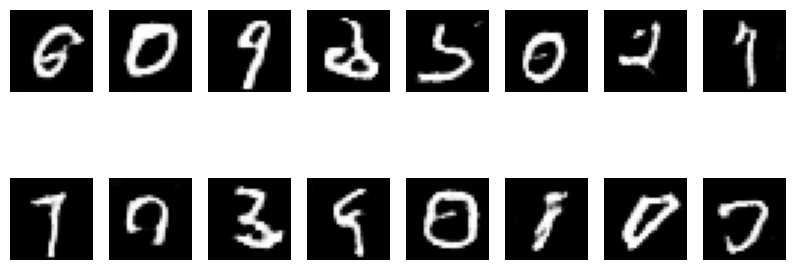

Epoch [11/50], Loss D: 0.6331136226654053, Loss G: 1.3150310516357422
Epoch [12/50], Loss D: 1.2188162803649902, Loss G: 0.8490670919418335
Epoch [13/50], Loss D: 0.7204430103302002, Loss G: 1.6584570407867432
Epoch [14/50], Loss D: 0.6828807592391968, Loss G: 2.4720473289489746
Epoch [15/50], Loss D: 0.7090309262275696, Loss G: 1.2346552610397339
Epoch [16/50], Loss D: 0.5039185285568237, Loss G: 2.037710666656494
Epoch [17/50], Loss D: 0.5240666270256042, Loss G: 2.186699390411377
Epoch [18/50], Loss D: 0.7855527997016907, Loss G: 3.4028258323669434
Epoch [19/50], Loss D: 0.6373120546340942, Loss G: 3.6598267555236816
Epoch [20/50], Loss D: 0.5962956547737122, Loss G: 2.7256202697753906


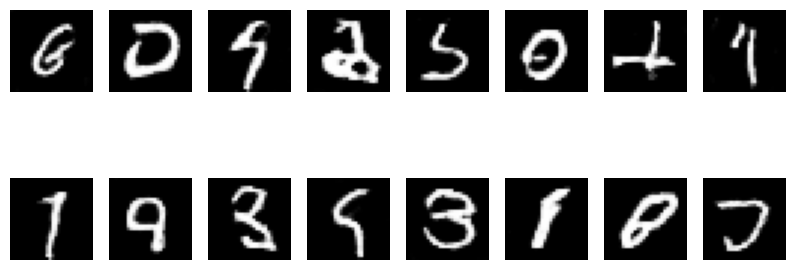

Epoch [21/50], Loss D: 0.49731963872909546, Loss G: 1.4638742208480835
Epoch [22/50], Loss D: 0.7745051980018616, Loss G: 1.225022792816162
Epoch [23/50], Loss D: 0.6041897535324097, Loss G: 1.2274996042251587
Epoch [24/50], Loss D: 0.5235248804092407, Loss G: 2.5778439044952393
Epoch [25/50], Loss D: 0.46995916962623596, Loss G: 2.1830055713653564
Epoch [26/50], Loss D: 0.3511197566986084, Loss G: 2.7536425590515137
Epoch [27/50], Loss D: 0.4263527989387512, Loss G: 1.9838790893554688
Epoch [28/50], Loss D: 0.920730471611023, Loss G: 4.361396789550781
Epoch [29/50], Loss D: 0.3481447398662567, Loss G: 2.808537244796753
Epoch [30/50], Loss D: 0.9884463548660278, Loss G: 4.784156322479248


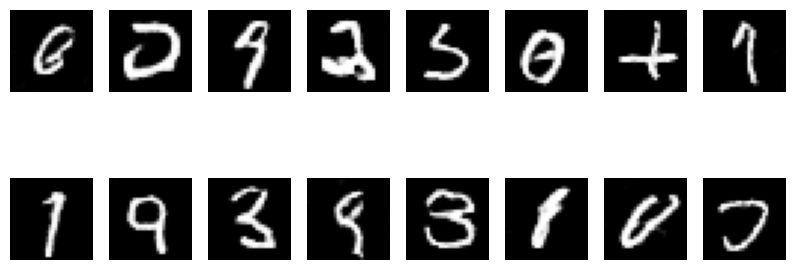

Epoch [31/50], Loss D: 0.5243808031082153, Loss G: 2.8978896141052246
Epoch [32/50], Loss D: 0.6749680638313293, Loss G: 0.8973350524902344
Epoch [33/50], Loss D: 0.44187626242637634, Loss G: 1.9907677173614502
Epoch [34/50], Loss D: 0.5696357488632202, Loss G: 3.564314842224121
Epoch [35/50], Loss D: 0.4374544322490692, Loss G: 2.451173782348633
Epoch [36/50], Loss D: 0.35735225677490234, Loss G: 2.644191026687622
Epoch [37/50], Loss D: 0.4935542941093445, Loss G: 2.8391826152801514
Epoch [38/50], Loss D: 0.4038430452346802, Loss G: 2.2477164268493652
Epoch [39/50], Loss D: 0.49951425194740295, Loss G: 1.9250177145004272
Epoch [40/50], Loss D: 0.7054446935653687, Loss G: 2.1320323944091797


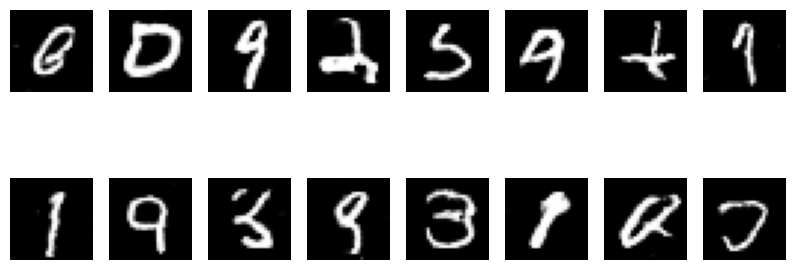

Epoch [41/50], Loss D: 0.5036004185676575, Loss G: 2.466031551361084
Epoch [42/50], Loss D: 1.3677068948745728, Loss G: 3.869305372238159
Epoch [43/50], Loss D: 0.4972286820411682, Loss G: 2.052030086517334
Epoch [44/50], Loss D: 0.4313797056674957, Loss G: 2.448871612548828
Epoch [45/50], Loss D: 0.46528226137161255, Loss G: 2.0946948528289795
Epoch [46/50], Loss D: 0.45286989212036133, Loss G: 3.168694496154785
Epoch [47/50], Loss D: 0.7099222540855408, Loss G: 4.370526313781738
Epoch [48/50], Loss D: 0.7241902947425842, Loss G: 1.1711928844451904
Epoch [49/50], Loss D: 0.45330318808555603, Loss G: 3.101860761642456
Epoch [50/50], Loss D: 0.7321254014968872, Loss G: 3.7023391723632812


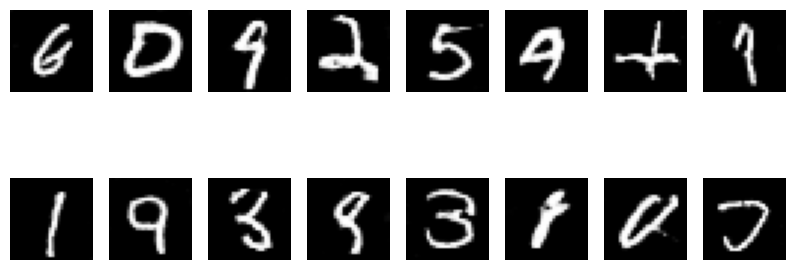

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset with normalization to (-1,1)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Scale images to [-1,1]
])

batch_size = 128
mnist_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(mnist_data, batch_size=batch_size, shuffle=True)

# ==========================
# Define Generator Network
# ==========================
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(100, 256, 7, 1, 0, bias=False),  # 1x1 -> 7x7
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),  # 7x7 -> 14x14
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.ConvTranspose2d(128, 1, 4, 2, 1, bias=False),  # 14x14 -> 28x28
            nn.Tanh()  # Normalize output to [-1,1]
        )

    def forward(self, z):
        return self.model(z)

# ==========================
# Define Discriminator Network
# ==========================
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 128, 4, 2, 1, bias=False),  # 28x28 -> 14x14
            nn.LeakyReLU(0.2),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),  # 14x14 -> 7x7
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),

            nn.Conv2d(256, 1, 7, 1, 0, bias=False),  # 7x7 -> 1x1
            nn.Sigmoid()  # Output probability (real/fake)
        )

    def forward(self, img):
        return self.model(img).view(-1, 1)

# ==========================
# Initialize Models
# ==========================
G = Generator().to(device)
D = Discriminator().to(device)

# Loss and Optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training Loop
epochs = 50
fixed_noise = torch.randn(16, 100, 1, 1, device=device)  # Fixed noise for visualization

for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Labels
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Train Discriminator
        z = torch.randn(batch_size, 100, 1, 1, device=device)
        fake_imgs = G(z).detach()

        D_real = D(real_imgs)
        D_fake = D(fake_imgs)

        loss_D_real = criterion(D_real, real_labels)
        loss_D_fake = criterion(D_fake, fake_labels)
        loss_D = loss_D_real + loss_D_fake

        optimizer_D.zero_grad()
        loss_D.backward()
        optimizer_D.step()

        # Train Generator
        z = torch.randn(batch_size, 100, 1, 1, device=device)
        fake_imgs = G(z)
        D_fake = D(fake_imgs)

        loss_G = criterion(D_fake, real_labels)  # Try to fool the discriminator

        optimizer_G.zero_grad()
        loss_G.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss D: {loss_D.item()}, Loss G: {loss_G.item()}")

    # Generate and visualize images every 10 epochs
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            fake_imgs = G(fixed_noise).cpu()
        fig, ax = plt.subplots(2, 8, figsize=(10, 4))
        for i, img in enumerate(fake_imgs):
            ax[i//8, i%8].imshow(img.squeeze(), cmap='gray')
            ax[i//8, i%8].axis('off')
        plt.show()
